In [1]:

project_id = 'hw1section2'
from google.colab import auth
auth.authenticate_user()
print('Authenticated')



Authenticated


           EventType         CNAME  Event_ID           BeginTime
0       winter storm     LIMESTONE   5167467 2000-12-31 00:00:00
1       winter storm         LAMAR   5167464 2000-12-31 00:00:00
2       winter storm  THROCKMORTON   5167593 2000-12-31 00:00:00
3       winter storm     ROBERTSON   5167476 2000-12-31 00:00:00
4       winter storm          JACK   5169181 2000-12-31 00:00:00
...              ...           ...       ...                 ...
472051       tornado          POLK   9981922 1950-01-13 05:25:00
472052       tornado      VAN WERT  10086808 1950-01-03 16:00:00
472053       tornado    MONTGOMERY  10009711 1950-01-03 11:55:00
472054       tornado       MADISON  10009710 1950-01-03 11:10:00
472055       tornado     ST. LOUIS  10063615 1950-01-03 11:00:00

[472056 rows x 4 columns]
                              Type  No: times
0                thunderstorm wind     159014
1                             hail     126195
2                          tornado      42985
3        

IndexError: ignored

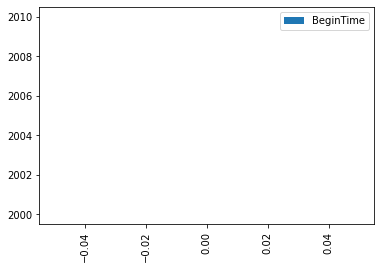

In [78]:
import pandas as pd
str2 = '1950'
str1 = 'bigquery-public-data.noaa_historic_severe_storms.storms_ '
### starting station

sql10 = """
SELECT
  event_type as EventType,
  cz_name as CNAME,
  event_id as Event_ID,
  event_begin_time as BeginTime,
FROM
  `bigquery-public-data.noaa_historic_severe_storms.storms_*`
WHERE
  event_begin_time BETWEEN "1950-1-1" AND "2000-12-31"
GROUP BY
  EventType,
  Event_ID,
  CNAME,
  BeginTime
ORDER BY
  BeginTime DESC
"""

Start = pd.io.gbq.read_gbq(sql10, project_id='hw1section2', dialect='standard')
print(Start)
Start.to_csv('data.csv')

Events40 = Start['EventType'].value_counts().rename_axis('Type').reset_index(name='No: times')
print(Events40)


select_Decades = Start[Start['BeginTime'] == '2000']
select_Decades = select_Decades[select_Decades['EventType'] == 'tornado']

select_Decades1 = Start[Start['BeginTime'] == '1990']
select_Decades1 = select_Decades1[select_Decades1['EventType'] == 'tornado']

select_Decades2 = Start[Start['BeginTime'] == '1980']
select_Decades2 = select_Decades2[select_Decades2['EventType'] == 'tornado']

select_Decades3 = Start[Start['BeginTime'] == '1970']
select_Decades3 = select_Decades3[select_Decades3['EventType'] == 'tornado']

select_Decades4 = Start[Start['BeginTime'] == '1960']
select_Decades4 = select_Decades4[select_Decades4['EventType'] == 'tornado']

select_Decades5 = Start[Start['BeginTime'] == '1950']
select_Decades5 = select_Decades5[select_Decades5['EventType'] == 'tornado']


bigdata = select_Decades.append(select_Decades1, ignore_index=True)
bigdata = bigdata.append(select_Decades2, ignore_index=True)
bigdata = bigdata.append(select_Decades3, ignore_index=True)
bigdata = bigdata.append(select_Decades4, ignore_index=True)
bigdata = bigdata.append(select_Decades5, ignore_index=True)
print (bigdata)
bigdata.plot.bar()
print(Start.dtypes)

The top event type is thunderstorm wind
it occurs 159014 times

